In [1]:
import pandas as pd
import json

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
fontsize=14

In [3]:
results_file = "results.csv"
df = pd.read_csv(results_file)

In [4]:
df["MiB"] = df["byte_size"] / 1024**2

In [5]:
df

,name,variant,median_time,byte_size,build_time,searcher,dataset,MiB
0,RMI,0,181.710,402653216,0,BinarySearch,books_200M_uint64,384.000031
1,RMI,1,188.781,201326608,0,BinarySearch,books_200M_uint64,192.000015
2,RMI,2,198.210,100663312,0,BinarySearch,books_200M_uint64,96.000015
3,RMI,3,234.162,41943040,0,BinarySearch,books_200M_uint64,40.000000
4,RMI,4,208.395,12582928,0,BinarySearch,books_200M_uint64,12.000015
5,RMI,5,216.359,6291472,0,BinarySearch,books_200M_uint64,6.000015
6,RMI,6,246.739,786464,0,BinarySearch,books_200M_uint64,0.750031
7,RMI,7,320.711,24608,0,BinarySearch,books_200M_uint64,0.023468
8,RMI,8,406.379,6160,0,BinarySearch,books_200M_uint64,0.005875
9,RMI,9,459.746,3088,0,BinarySearch,books_200M_uint64,0.002945


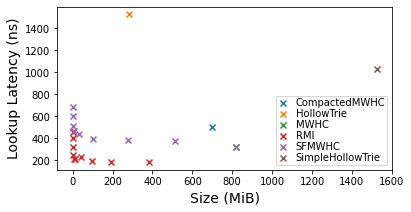

In [6]:
def plot():
    fig, ax = plt.subplots(figsize=(6, 3))
    #ax.set_xlim(-50, 2000)
    #ax.set_ylim(0, 2000)
        
    for name, group in df.groupby(["name"]):
        ax.scatter(data=group, x="MiB", y="median_time", label=f"{name}", marker='x')
        
    ax.legend(labelspacing=0.1, borderpad=0.2, handlelength=1)
    
    ax.set_xlabel("Size (MiB)", fontsize=fontsize)
    ax.set_ylabel("Lookup Latency (ns)", fontsize=fontsize, x=0.05)
    
    fig.savefig("mmphf_experiment.png", bbox_inches="tight", dpi=300)

plot()